1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

<h3>Import Module</h3>

In [74]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


<h3>Import Dataset</h3>

In [75]:
url = "https://raw.githubusercontent.com/Keipatr/Classification-Rules/main/vertebrate.csv"
df = pd.read_csv(url)
df.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


In [76]:
import pandas as pd
import numpy as np
# Data
data = {
    'day': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    'outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menampilkan lima baris pertama dari dataset
df.head()


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [77]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada fitur-fitur kategorikal
categorical_features = ['outlook', 'temp', 'humidity', 'wind', 'play']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Menampilkan lima baris pertama dari dataset setelah Label Encoding
print(df.head())


  day  outlook  temp  humidity  wind  play
0  D1        2     1         0     1     0
1  D2        2     1         0     0     0
2  D3        0     1         0     1     1
3  D4        1     2         0     1     1
4  D5        1     0         1     1     1


In [78]:
from sklearn.tree import DecisionTreeClassifier

# Pisahkan fitur dan target
X = df.drop(['play', 'day'], axis=1)  # Fitur
y = df['play']  # Target

# Inisialisasi model Decision Stumps
base_model = DecisionTreeClassifier(max_depth=1)

# Latih model Decision Stumps
base_model.fit(X, y)

# Evaluasi akurasi model Decision Stumps
accuracy = base_model.score(X, y)
print(f"Akurasi Model Decision Stumps: {accuracy:.2f}")


Akurasi Model Decision Stumps: 0.64


In [79]:
# Inisialisasi bobot untuk setiap instance
weights = [1 / len(df)] * len(df)

# Jumlah iterasi yang diinginkan
n_iterations = 6

for iteration in range(n_iterations):
    # Menyamakan bobot untuk setiap iterasi
    weights = [weight / sum(weights) for weight in weights]

    # Latih model Decision Stumps pada data dengan bobot
    base_model.fit(X, y, sample_weight=weights)

    # Prediksi dengan model saat ini
    predictions = base_model.predict(X)

    # Hitung kesalahan prediksi
    errors = [int(prediction != actual) for prediction, actual in zip(predictions, y)]

    # Menghitung weighted error rate
    weighted_error = sum(weight * error for weight, error in zip(weights, errors))

    # Menghitung alpha (Bobot hasil model)
    alpha = 0.5 * np.log((1 - weighted_error) / max(weighted_error, 1e-10))

    # Menyesuaikan bobot untuk instance yang salah diprediksi
    weights = [weight * np.exp(alpha * error) for weight, error in zip(weights, errors)]

    # Menampilkan hasil setiap iterasi
    print(f"Iterasi {iteration + 1}: Weighted Error = {weighted_error:.4f}, Alpha = {alpha:.4f}")


Iterasi 1: Weighted Error = 0.3571, Alpha = 0.2939
Iterasi 2: Weighted Error = 0.2764, Alpha = 0.4812
Iterasi 3: Weighted Error = 0.3055, Alpha = 0.4107
Iterasi 4: Weighted Error = 0.3548, Alpha = 0.2990
Iterasi 5: Weighted Error = 0.3549, Alpha = 0.2989
Iterasi 6: Weighted Error = 0.3790, Alpha = 0.2470


In [80]:
# Inisialisasi prediksi akhir dengan bobot nol
final_predictions = [0] * len(X)

# Inisialisasi nilai total bobot alpha
total_alpha = 0

for iteration in range(n_iterations):
    # Menggunakan model saat ini untuk prediksi
    predictions = base_model.predict(X)

    # Mendapatkan alpha dari model saat ini
    alpha = 0.5 * np.log((1 - weighted_error) / max(weighted_error, 1e-10))

    # Menambahkan prediksi dengan bobot alpha ke prediksi akhir
    final_predictions = [sum(pair) for pair in zip(final_predictions, [alpha * pred for pred in predictions])]

    # Menambahkan bobot alpha ke total_alpha
    total_alpha += alpha

# Normalisasi prediksi akhir dengan total_alpha
final_predictions = [pred / total_alpha for pred in final_predictions]

# Mengonversi prediksi akhir menjadi kelas (misal: Yes atau No)
final_predictions = ['Yes' if pred > 0.5 else 'No' for pred in final_predictions]

# Menampilkan prediksi akhir
print("Prediksi Akhir:")
print(final_predictions)


Prediksi Akhir:
['No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No']


c:\Users\tugas\anaconda3\envs\tugas\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


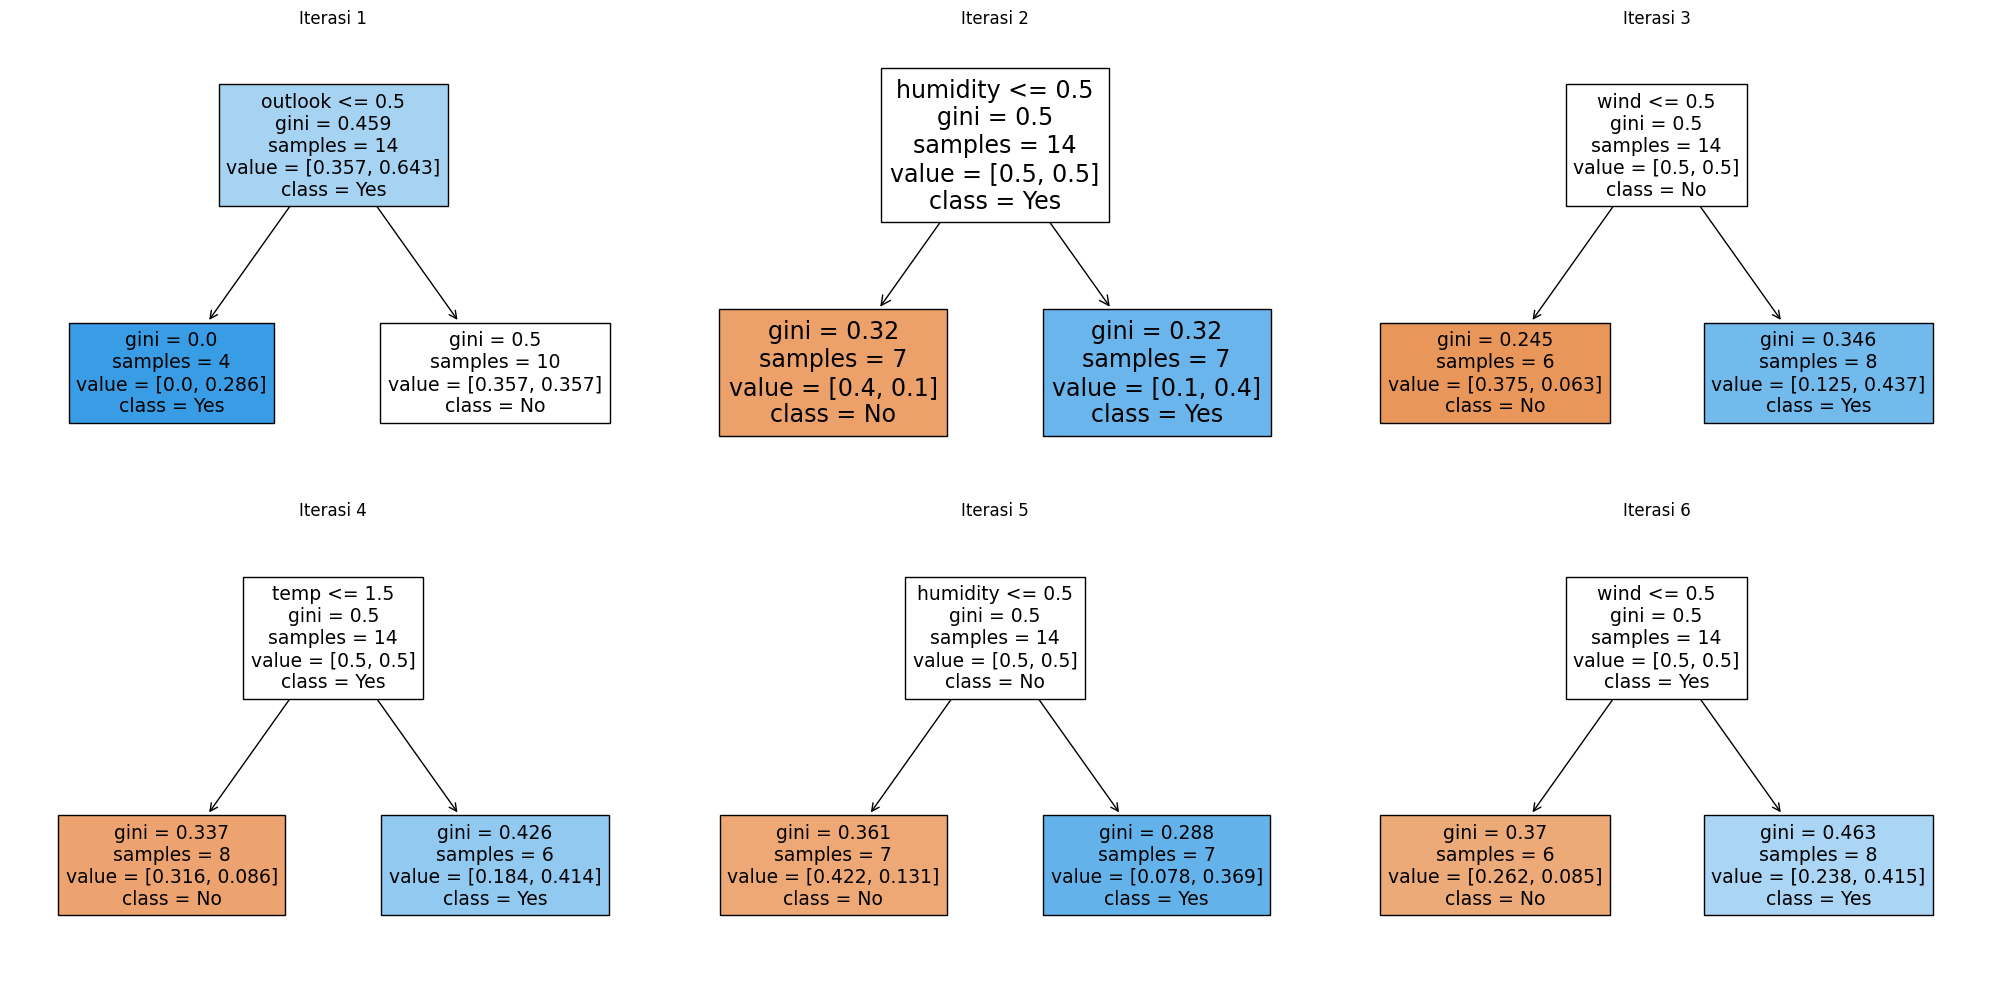

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Inisialisasi model Adaboost dengan Decision Stumps sebagai base model
adaboost_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=n_iterations, random_state=42)

# Melatih model Adaboost
adaboost_model.fit(X, y)

# Inisialisasi figure
plt.figure(figsize=(20, 10))

# Visualisasi pohon keputusan dari setiap iterasi
for i, tree in enumerate(adaboost_model.estimators_):
    plt.subplot(2, 3, i+1)
    plot_tree(tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
    plt.title(f"Iterasi {i+1}")

# Menampilkan visualisasi pohon keputusan dari setiap iterasi
plt.tight_layout()
plt.show()


c:\Users\tugas\anaconda3\envs\tugas\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


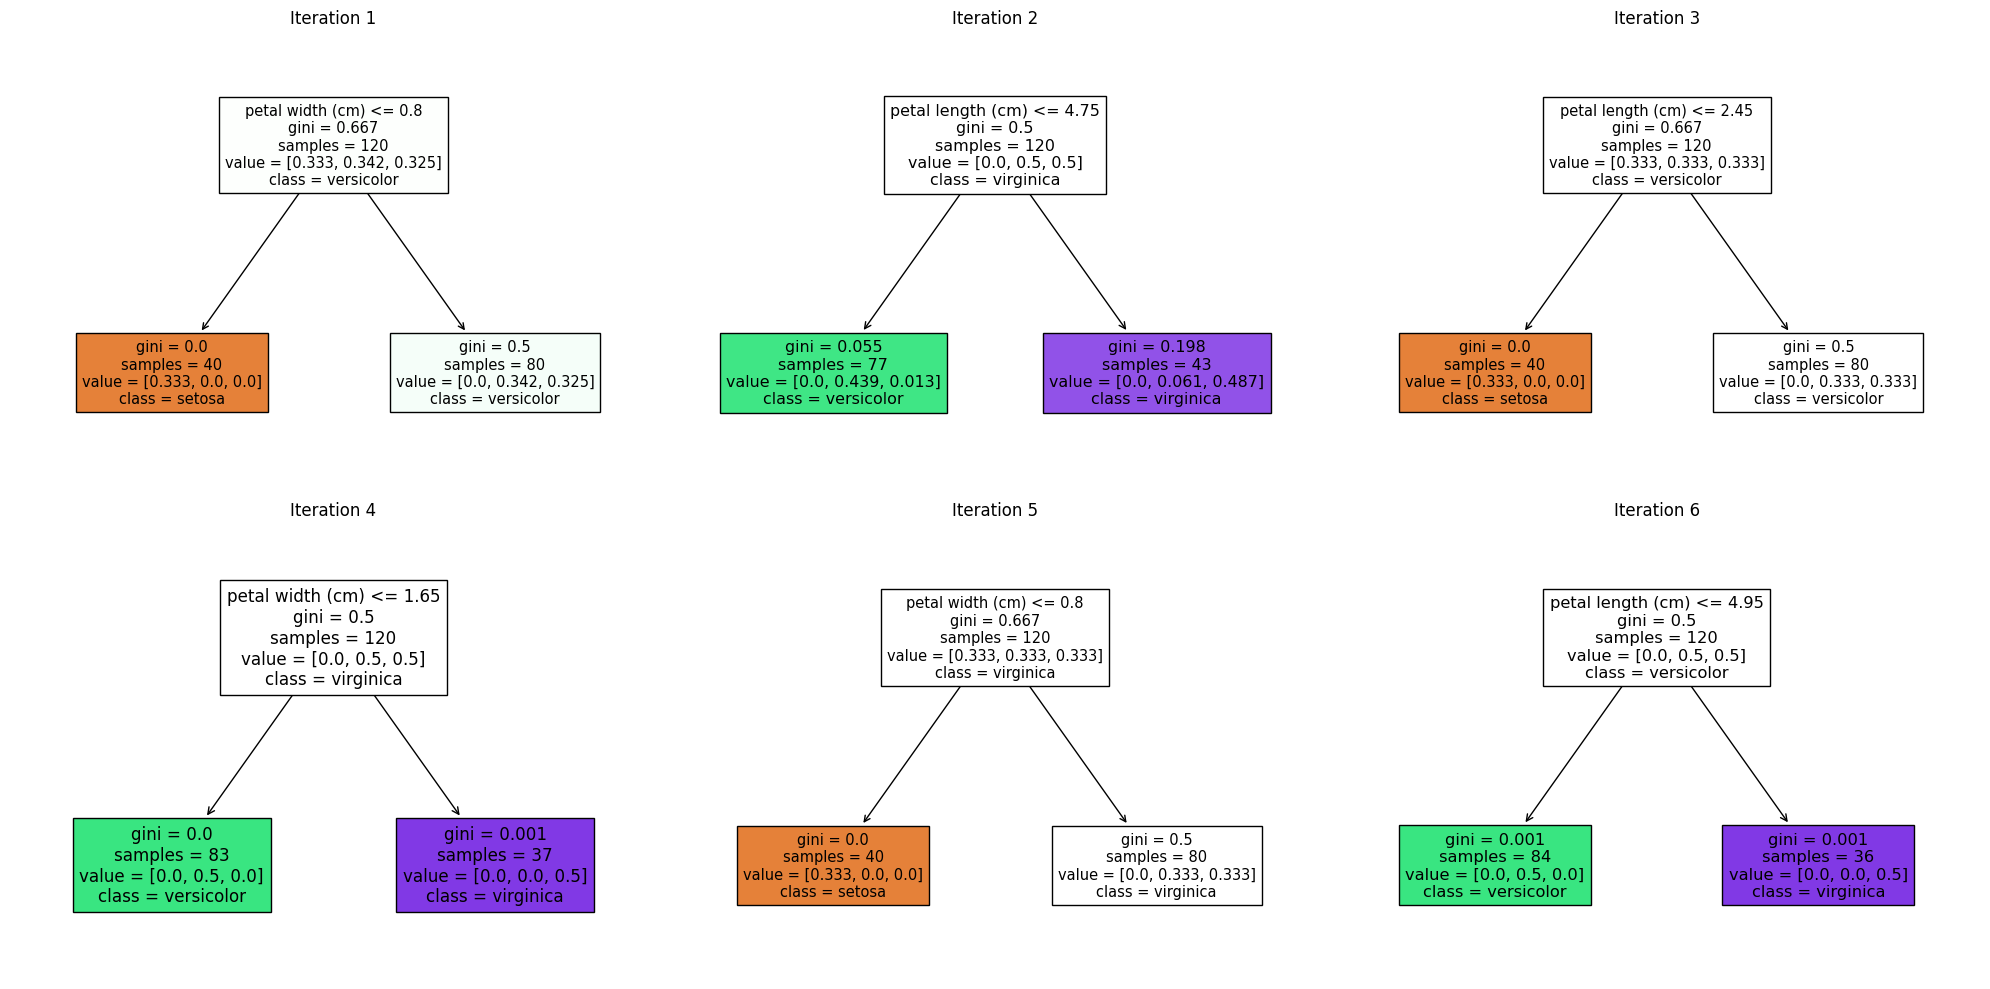

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (misal: iris dataset untuk contoh)
iris = load_iris()
X, y = iris.data, iris.target

# Inisialisasi model Decision Tree sebagai base model
base_model = DecisionTreeClassifier(max_depth=1)

# Inisialisasi model Adaboost dengan Decision Tree sebagai base model
n_iterations = 6
adaboost_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=n_iterations, random_state=42)

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Adaboost
adaboost_model.fit(X_train, y_train)

# Inisialisasi figure
plt.figure(figsize=(20, 10))

# Visualisasi pohon keputusan dari setiap iterasi
for i, tree in enumerate(adaboost_model.estimators_):
    plt.subplot(2, 3, i+1)
    plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    plt.title(f"Iteration {i+1}")

# Menampilkan visualisasi pohon keputusan dari setiap iterasi
plt.tight_layout()
plt.show()


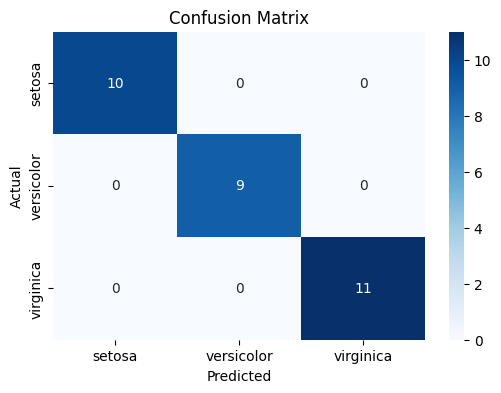

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi pada data uji
y_pred = adaboost_model.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

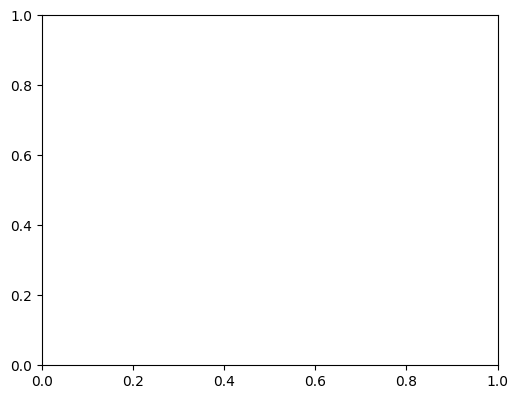

In [83]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset Iris sebagai contoh
iris = load_iris()
X, y = iris.data, iris.target

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model XGBoost
n_iterations = 5  # Jumlah iterasi (pohon keputusan) yang diinginkan
xgboost_model = xgb.XGBClassifier(n_estimators=n_iterations, random_state=42)

# Melatih model XGBoost
xgboost_model.fit(X_train, y_train)

# Visualisasi pohon keputusan dari setiap iterasi
plt.figure(figsize=(20, 10))
for i in range(n_iterations):
    plt.subplot(2, 3, i+1)
    plot_tree(xgboost_model, num_trees=i, ax=plt.gca())
    plt.title(f"Iterasi {i+1}")
plt.tight_layout()
plt.show()
